In [315]:
import pandas as pd
import numpy as np
import pickle
import json

In [316]:
# 3d plot the midpoints
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [317]:
sims_file = 'GenTestSpecs/sims_01.csv'
res_info_folder = '../01_GeneratePureSpectrums/ResInfo/res_info_'
sims_df = pd.read_csv(sims_file)
print(sims_df)
pickle_files = 'GenTestSpecs/specs/'+sims_df['filename']+'.pkl'

  soil_resolution function    id              filename
0           1x1x1  Coconut  1022  1x1x1_Coconut_001022
1           2x2x2  Coconut  1045  2x2x2_Coconut_001045
2           7x7x7  Coconut  1068  7x7x7_Coconut_001068


In [318]:

i = 2

pickle_file = pickle_files[i]
soil_resolution = sims_df['soil_resolution'][i]
res_info_file = res_info_folder + str(soil_resolution) + '.json'
res_info = json.load(open(res_info_file, 'r'))
midpoints = np.array(res_info['midpoints'])
detector_tally_ids = [int(r) for r in res_info['detector_tally_ids']]
cell_ids = [int(r) for r in res_info['cell_ids']]

In [319]:
detector_tally_ids

[808, 818, 828, 834, 836, 844, 846]

In [320]:
i_bins, i_spectrums= pickle.load(open(pickle_file, 'rb'))
energy_bins = i_bins[-1][-2]

In [321]:
detector_energy_bins = i_bins[0][-2]

In [322]:
deposition_bins = [int(bin) for bin in i_bins[-1][0]]
deposition_spec = i_spectrums[-1]

new_shape = np.array(deposition_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in deposition_bins:
        new_array[j] = deposition_spec[deposition_bins.index(cell_ids[j])]

full_deposition_spec = new_array

In [323]:
deposition_intensity = full_deposition_spec
deposition_intensity = np.matmul(energy_bins, deposition_intensity).flatten()
# print(deposition_intensity.shape)
deposition_activity = deposition_intensity
# # put intensity in 0-1 range
deposition_intensity = deposition_intensity / deposition_intensity.max()

In [324]:
flux_bins = [int(bin) for bin in i_bins[-2][0]]
flux_spec = i_spectrums[-2]

new_shape = np.array(flux_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in flux_bins:
        new_array[j] = flux_spec[flux_bins.index(cell_ids[j])]
full_flux_spec = new_array

In [325]:
flux_intensity = new_array.sum(axis=-2).flatten()
flux_activity = flux_intensity
# put intensity in 0-1 range    
flux_intensity = flux_intensity / flux_intensity.max()

In [326]:
[len(bins) for bins in i_bins[4]]

[1, 1, 318, 1, 1, 1, 935, 1]

In [327]:
np.sum(i_spectrums[4])

np.float64(3.8678658695260755e-07)

In [328]:
causal_bins = [str(bin)[:len(str(cell_ids[0]))] for bin in i_bins[4][2]]
causal_bins = (np.array(causal_bins)).astype(int).tolist()
causal_spec = i_spectrums[4]
new_shape = np.array(causal_spec.shape)
new_shape[2] = len(cell_ids)
print(new_shape)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in causal_bins:
        new_array[:, :, j] = causal_spec[:, :, causal_bins.index(cell_ids[j])]
full_causal_spec = new_array
causal_intensity = np.matmul(detector_energy_bins, full_causal_spec).flatten()
causal_activity = causal_intensity
causal_intensity = causal_intensity / causal_intensity.max()

[  1   1 343   1   1   1 935   1]


In [329]:
causal_intensity

array([3.82615437e-04, 1.72478205e-04, 9.32281821e-04, 1.07817304e-04,
       7.16689195e-04, 5.77890863e-04, 2.59943196e-05, 1.61385734e-03,
       1.73621837e-03, 5.73530532e-04, 1.16188739e-03, 0.00000000e+00,
       1.08307831e-03, 2.07422299e-03, 1.34912914e-03, 2.81185875e-03,
       3.87085248e-03, 1.98781875e-03, 2.75983801e-03, 3.05218823e-03,
       3.32721805e-03, 4.19318507e-03, 4.59290655e-03, 4.24525817e-03,
       0.00000000e+00, 4.29472285e-03, 4.93525107e-03, 5.27952100e-03,
       4.41000168e-03, 3.15706171e-03, 5.20186718e-03, 2.92988716e-03,
       3.85233190e-03, 6.03089445e-03, 5.27436180e-03, 1.55114434e-03,
       1.51541458e-03, 0.00000000e+00, 1.76522485e-03, 3.73583539e-03,
       2.84282200e-03, 3.22810547e-03, 5.75200935e-04, 7.00369955e-04,
       9.97446544e-04, 1.85403079e-03, 1.26711261e-03, 3.11510894e-03,
       2.06684219e-03, 6.09624696e-04, 0.00000000e+00, 1.29261251e-03,
       1.56891302e-03, 8.40127595e-04, 9.30755485e-04, 6.21062143e-04,
      

In [330]:
# plt.plot(detector_energy_bins, full_causal_spec.flatten())

In [331]:
causal_bins

[9000,
 9001,
 9002,
 9003,
 9004,
 9005,
 9006,
 9007,
 9008,
 9009,
 9010,
 9012,
 9013,
 9014,
 9015,
 9016,
 9017,
 9018,
 9019,
 9020,
 9021,
 9022,
 9023,
 9025,
 9026,
 9027,
 9028,
 9029,
 9030,
 9031,
 9032,
 9033,
 9034,
 9035,
 9036,
 9038,
 9039,
 9040,
 9041,
 9042,
 9043,
 9044,
 9045,
 9046,
 9047,
 9048,
 9049,
 9051,
 9052,
 9053,
 9054,
 9055,
 9056,
 9057,
 9058,
 9059,
 9060,
 9061,
 9062,
 9064,
 9065,
 9066,
 9067,
 9068,
 9069,
 9070,
 9071,
 9072,
 9073,
 9074,
 9075,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9083,
 9084,
 9085,
 9086,
 9087,
 9088,
 9090,
 9091,
 9092,
 9093,
 9094,
 9095,
 9096,
 9097,
 9098,
 9099,
 9100,
 9101,
 9103,
 9104,
 9105,
 9106,
 9107,
 9108,
 9109,
 9110,
 9111,
 9112,
 9113,
 9114,
 9116,
 9117,
 9118,
 9119,
 9120,
 9121,
 9122,
 9123,
 9124,
 9125,
 9126,
 9127,
 9129,
 9130,
 9131,
 9132,
 9133,
 9134,
 9135,
 9136,
 9137,
 9138,
 9139,
 9140,
 9142,
 9143,
 9144,
 9145,
 9146,
 9147,
 9148,
 9149,
 9150,
 9151,
 9152,
 9153,

In [332]:
cell_ids

[9000,
 9001,
 9002,
 9003,
 9004,
 9005,
 9006,
 9007,
 9008,
 9009,
 9010,
 9011,
 9012,
 9013,
 9014,
 9015,
 9016,
 9017,
 9018,
 9019,
 9020,
 9021,
 9022,
 9023,
 9024,
 9025,
 9026,
 9027,
 9028,
 9029,
 9030,
 9031,
 9032,
 9033,
 9034,
 9035,
 9036,
 9037,
 9038,
 9039,
 9040,
 9041,
 9042,
 9043,
 9044,
 9045,
 9046,
 9047,
 9048,
 9049,
 9050,
 9051,
 9052,
 9053,
 9054,
 9055,
 9056,
 9057,
 9058,
 9059,
 9060,
 9061,
 9062,
 9063,
 9064,
 9065,
 9066,
 9067,
 9068,
 9069,
 9070,
 9071,
 9072,
 9073,
 9074,
 9075,
 9076,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9083,
 9084,
 9085,
 9086,
 9087,
 9088,
 9089,
 9090,
 9091,
 9092,
 9093,
 9094,
 9095,
 9096,
 9097,
 9098,
 9099,
 9100,
 9101,
 9102,
 9103,
 9104,
 9105,
 9106,
 9107,
 9108,
 9109,
 9110,
 9111,
 9112,
 9113,
 9114,
 9115,
 9116,
 9117,
 9118,
 9119,
 9120,
 9121,
 9122,
 9123,
 9124,
 9125,
 9126,
 9127,
 9128,
 9129,
 9130,
 9131,
 9132,
 9133,
 9134,
 9135,
 9136,
 9137,
 9138,
 9139,
 9140,
 9141,
 9142,

In [333]:
i_spectrums[4].shape

(1, 1, 318, 1, 1, 1, 935, 1)

In [334]:
i_spectrums[4].sum()

np.float64(3.8678658695260755e-07)

In [335]:
i_spectrums[4][:, :].sum()

np.float64(3.8678658695260755e-07)

In [336]:
i_spectrums[4][:, :, :-1].sum()

np.float64(2.765135385706075e-07)

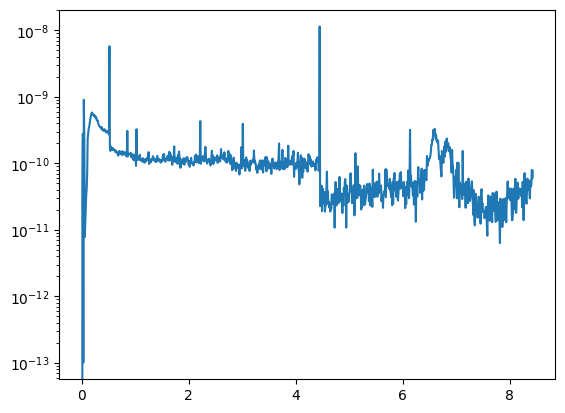

In [337]:
plt.plot(detector_energy_bins, i_spectrums[4][:, :, -1].flatten())
plt.yscale('log')

In [338]:
new_array.sum()

np.float64(2.7651353857060745e-07)

In [339]:
full_causal_spec.shape

(1, 1, 343, 1, 1, 1, 935, 1)

In [340]:
full_causal_spec.sum(axis=1).shape

(1, 343, 1, 1, 1, 935, 1)

In [341]:
def onespec(specs, n=0):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(energy_bins, specs[n].flatten(), label='Cell ID: {}'.format(cell_ids[n]))
    ax.set_yscale('log')
    plt.title('Cell ID: {}'.format(cell_ids[n]))
    fig.show()

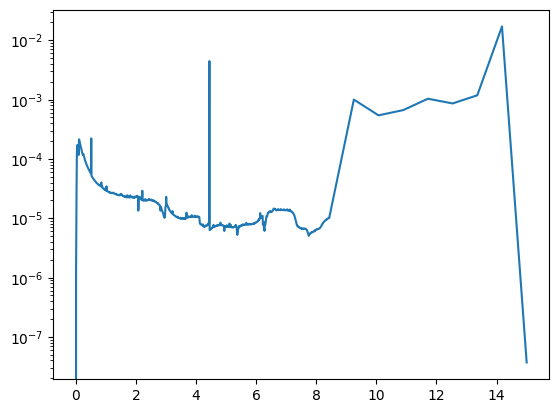

In [342]:
plt.plot(energy_bins, (full_flux_spec-full_deposition_spec).sum(axis=0).flatten())
plt.yscale('log')

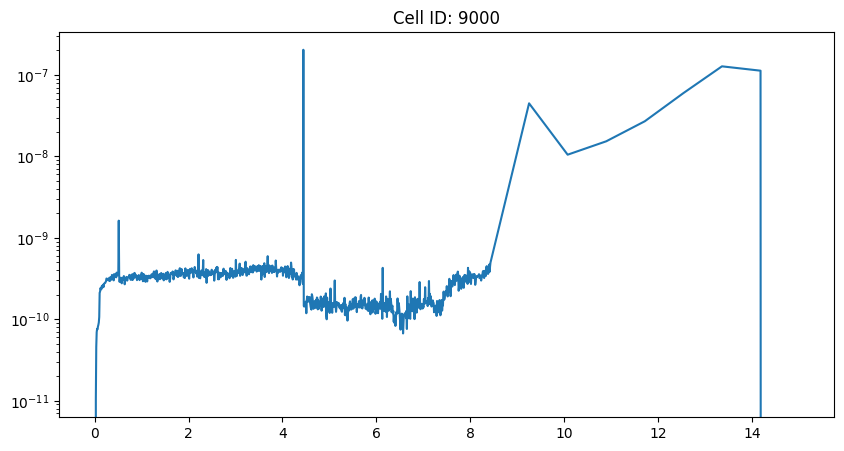

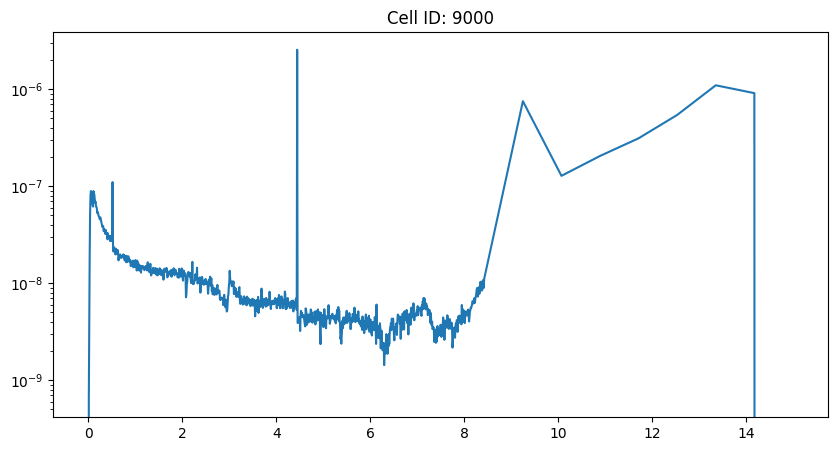

In [343]:

onespec(full_deposition_spec, n=0)
onespec(full_flux_spec, n=0)

In [344]:
def intensitymap(intensity, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=1-intensity, marker='o', s=intensity*40, alpha=intensity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()


    # xx, yy = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*ylim, 10))
    # zz = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz-20, alpha=1, color='black')

    # xx, zz = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*zlim, 10))
    # yy = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # yy, zz = np.meshgrid(np.linspace(*ylim, 10), np.linspace(*zlim, 10))
    # xx = np.zeros_like(yy)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # change the view angle
    ax.view_init(elev=elev, azim=azim)
    # ax.view_init(elev=0, azim=0)

    # add a color bar
    sc = ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=intensity, marker='o', s=intensity*300, alpha=1)
    fig.colorbar(sc, ax=ax, label='Relative Intensity', shrink=0.5, aspect=10)

    # make voxel style
    ax.set_box_aspect([1, 1, 1])  # aspect ratio is 1:1:1

    plt.title('3D Scatter Plot of Midpoints with Relative Intensity')
    plt.tight_layout()
    plt.show()

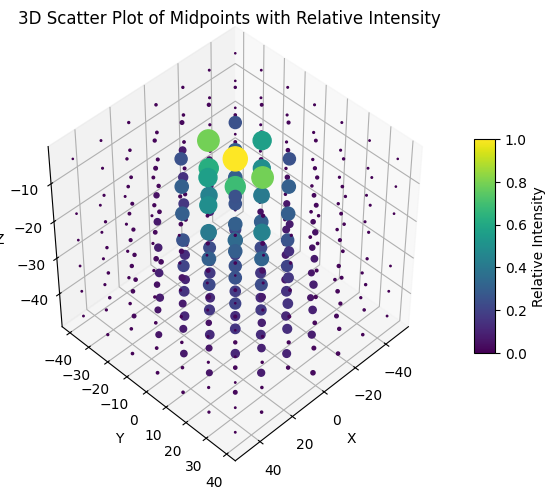

In [345]:
intensitymap(intensity=deposition_intensity, elev=45, azim=45)

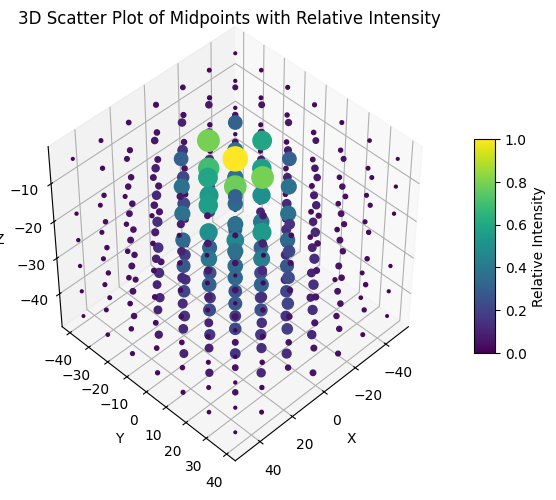

In [346]:
intensitymap(intensity=flux_intensity, elev=45, azim=45)

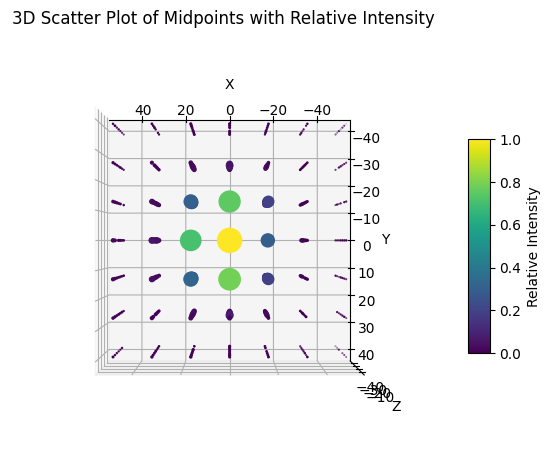

In [355]:
intensitymap(intensity=causal_intensity, elev=90, azim=90)

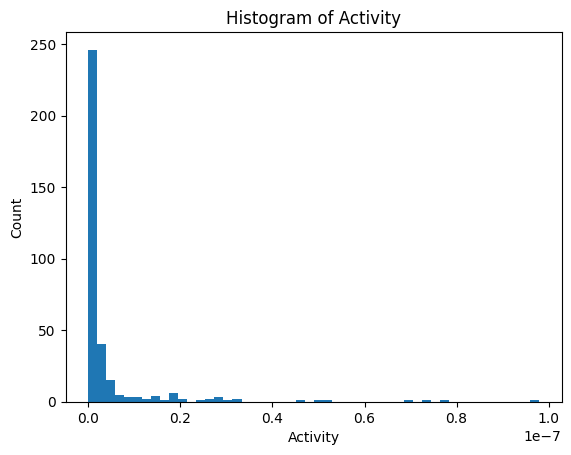

In [354]:
# histogram of intensity
plt.figure()
plt.hist(causal_activity, bins=50)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Histogram of Activity')
# the histogram log scale
# plt.yscale('log')
plt.show()